In [7]:
# For windows
# !pip install torch==2.6.0+cu126 torchvision==0.21.0+cu126 torchaudio==2.6.0 --index-url https://download.pytorch.org/whl/cu126

In [12]:
from PIL import Image
from transformers import pipeline
from collections import Counter
import matplotlib.pyplot as plt
from IPython.display import Audio as IPythonAudio
import torch
import numpy as np
import os
import warnings
from transformers.utils import logging

In [13]:
os.environ["TRANSFORMERS_NO_ADVISORY_WARNINGS"] = "true"
os.environ["TOKENIZERS_PARALLELISM"] = "false"
warnings.filterwarnings("ignore")
logging.set_verbosity_error()

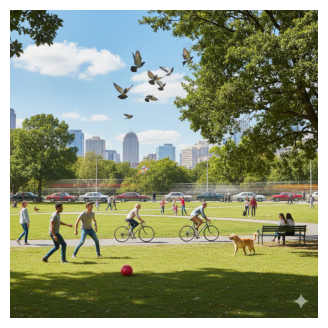

In [14]:
img = Image.open("images/image-test.png")

plt.figure(figsize=(6, 4))
plt.imshow(img)
plt.axis('off')
plt.show()

In [15]:
object_detection = pipeline(
    task="object-detection",
    model="facebook/detr-resnet-50",
)

detections = object_detection(img)

print(detections)

Loading weights:   0%|          | 0/530 [00:00<?, ?it/s]

[{'score': 0.9294224381446838, 'label': 'bird', 'box': {'xmin': 485, 'ymin': 235, 'xmax': 520, 'ymax': 267}}, {'score': 0.7733678221702576, 'label': 'person', 'box': {'xmin': 314, 'ymin': 616, 'xmax': 335, 'ymax': 665}}, {'score': 0.9816570281982422, 'label': 'dog', 'box': {'xmin': 75, 'ymin': 653, 'xmax': 103, 'ymax': 672}}, {'score': 0.9791968464851379, 'label': 'person', 'box': {'xmin': 883, 'ymin': 676, 'xmax': 929, 'ymax': 785}}, {'score': 0.7488658428192139, 'label': 'sports ball', 'box': {'xmin': 847, 'ymin': 675, 'xmax': 862, 'ymax': 689}}, {'score': 0.6802452206611633, 'label': 'car', 'box': {'xmin': 66, 'ymin': 605, 'xmax': 126, 'ymax': 633}}, {'score': 0.5930188894271851, 'label': 'truck', 'box': {'xmin': 738, 'ymin': 602, 'xmax': 852, 'ymax': 639}}, {'score': 0.8665482401847839, 'label': 'person', 'box': {'xmin': 792, 'ymin': 620, 'xmax': 814, 'ymax': 685}}, {'score': 0.9821542501449585, 'label': 'dog', 'box': {'xmin': 723, 'ymin': 745, 'xmax': 831, 'ymax': 819}}, {'score':

In [16]:
filtered = [
    d["label"]
    for d in detections
    if d["score"] >= 0.7
]
counts = Counter(filtered)
print("Counts:", counts)

Counts: Counter({'person': 22, 'car': 12, 'bird': 8, 'dog': 2, 'sports ball': 2, 'bicycle': 2, 'bench': 1})


In [17]:
def pluralize(word, count):
    if count == 1:
        return f"1 {word}"
    else:
        if word.endswith('s'):
            return f"{count} {word}es"
        else:
            return f"{count} {word}s"


def counts_to_sentence(counts):
    if not counts:
        return "No recognizable objects were detected in the image."

    parts = [pluralize(label, count) for label, count in counts.items()]

    if len(parts) == 1:
        return f"The image contains {parts[0]}."

    if len(parts) == 2:
        return f"The image contains {parts[0]} and {parts[1]}."

    return f"The image contains {', '.join(parts[:-1])}, and {parts[-1]}."

sentence = counts_to_sentence(counts)
print(sentence)

The image contains 8 birds, 22 persons, 2 dogs, 2 sports balls, 12 cars, 1 bench, and 2 bicycles.


In [19]:
narrator = pipeline(
    task="text-to-audio",
    model="suno/bark-small"
)

narrated_text = narrator(sentence)
sampling_rate = narrated_text["sampling_rate"]
audio = np.array(narrated_text["audio"])
if audio.ndim == 2:
    audio = audio.squeeze(0)

print(f"Shape: {audio.shape}, Sampling Rate: {sampling_rate}")

Loading weights:   0%|          | 0/542 [00:00<?, ?it/s]

Shape: (302720,), Sampling Rate: 24000


In [20]:
IPythonAudio(audio, rate=sampling_rate)